### impport dataset

In [33]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from graphviz import Source

In [34]:
diabetes_df = pd.read_csv('diabetes.csv')

In [35]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [37]:
feature_col = ['Pregnancies', 'Glucose', 'BloodPressure',  'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_df[feature_col]
y = diabetes_df.Outcome

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### Build Decision Tree

In [39]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [40]:
## evaluate
print("Accurary: ", metrics.accuracy_score(y_test, y_pred))

Accurary:  0.6623376623376623


### Visualizing Decision Tree

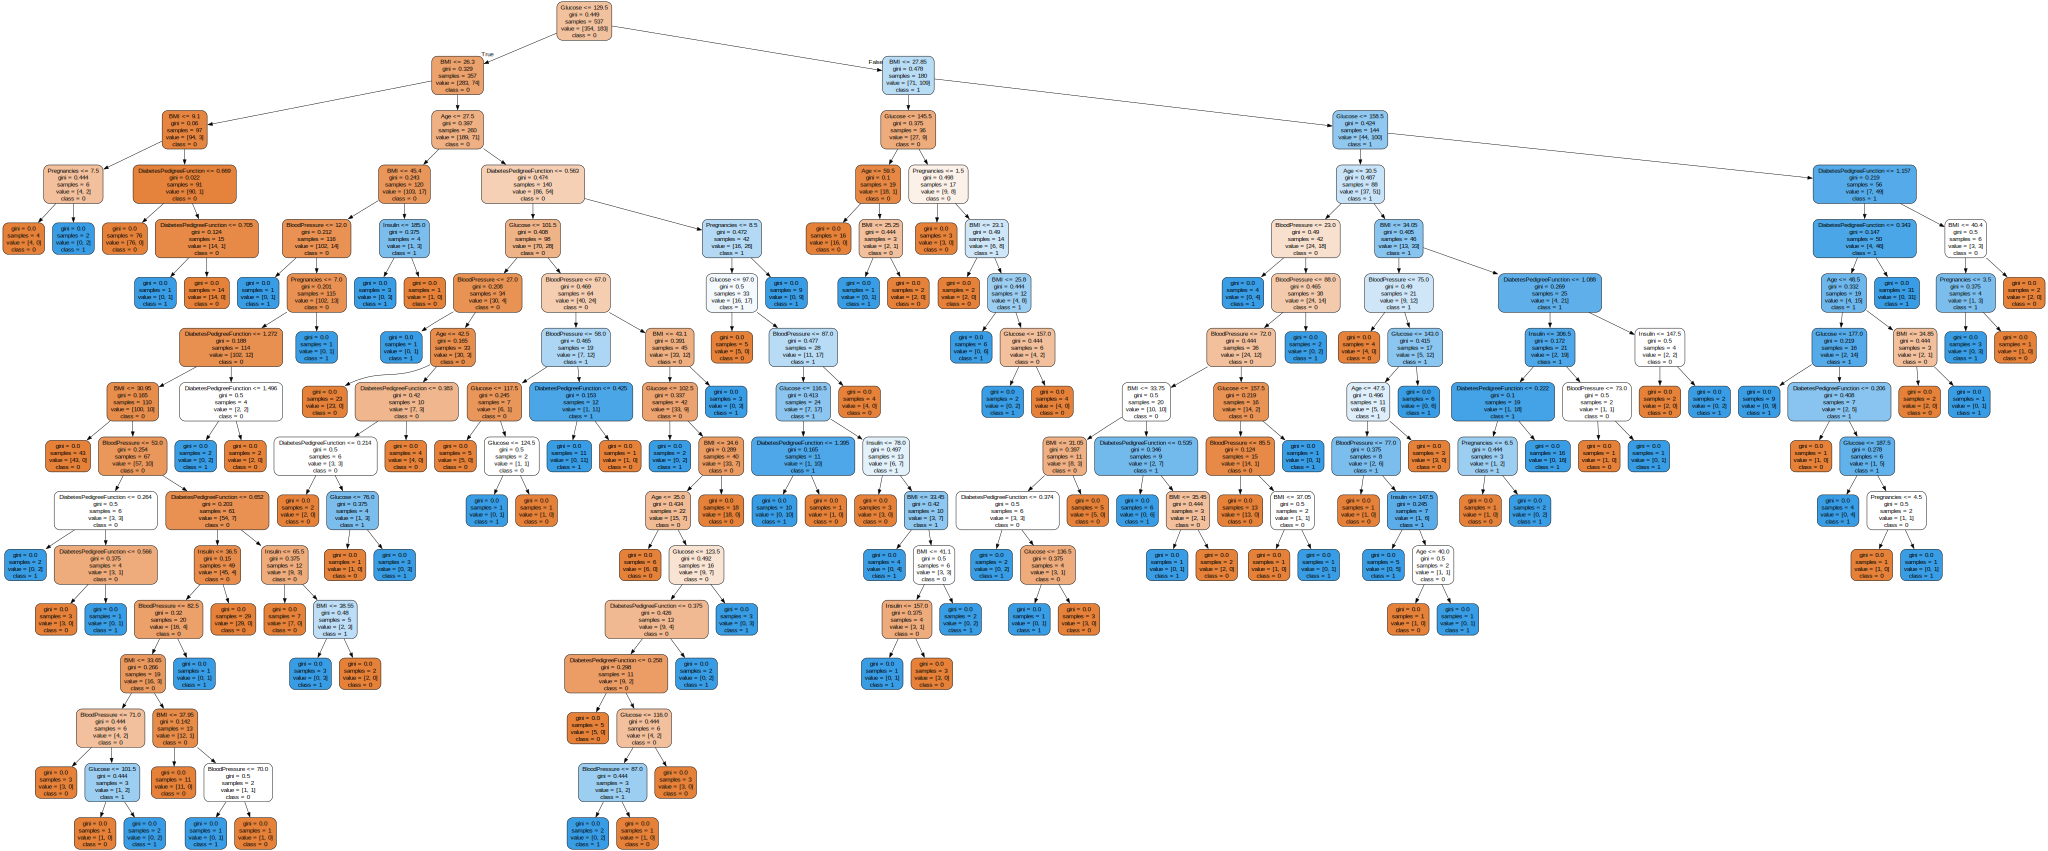

In [41]:
tree.export_graphviz(
    clf,
    out_file = 'diabetes_tree.dot',
    feature_names = X.columns,
    class_names = ['0','1'],
    rounded = True,
    filled = True
)
with open ("diabetes_tree.dot") as f:
    dot_graph = f.read()

Source(dot_graph)

### Optimizing Decision Tree Performance

In [45]:
clf_opt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
clf_opt = clf_opt.fit(X_train, y_train)
y_pred_opt = clf_opt.predict(X_test)

In [46]:
## evaluate
print("Accurary: ", metrics.accuracy_score(y_test, y_pred_opt))

Accurary:  0.7705627705627706


### Visualizing Optimized model

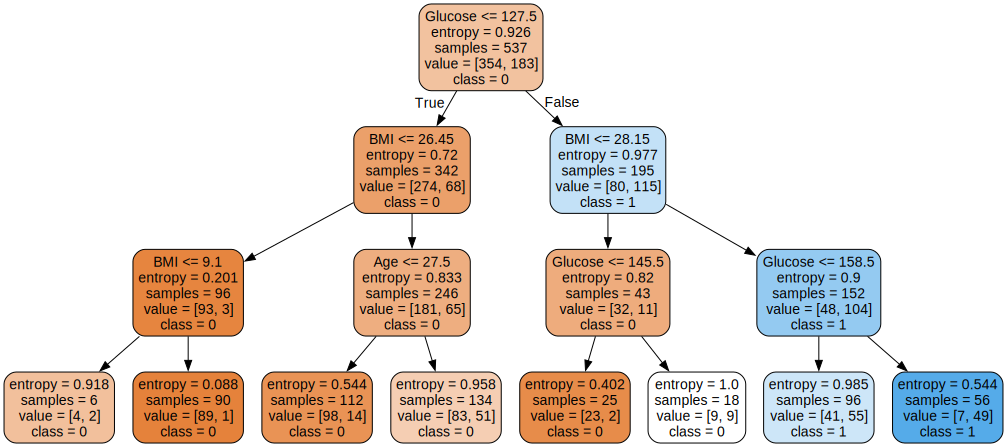

In [47]:
tree.export_graphviz(
    clf_opt,
    out_file = 'diabetes_tree_opt.dot',
    feature_names = X.columns,
    class_names = ['0','1'],
    rounded = True,
    filled = True
)
with open ("diabetes_tree_opt.dot") as f:
    dot_graph = f.read()

Source(dot_graph)